In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_latest_cleaned.parquet')
df_after = pd.read_parquet('/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_latest_cleaned_after_user_removal.parquet')

In [3]:
df

,task,value,id_str,user_id,classification_id,created_at,subject_ids
0,smooth-or-featured,featured-or-disk,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
1,disk-edge-on,no,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
2,bar,strong,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
3,has-spiral-arms,no,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
4,bulge-size,moderate,bb9c2a3aab7b48ac9c21b7d6c781d062342ed8f2dd4145...,290475,575637319,2024-08-01 12:31:20+00:00,101103135
...,...,...,...,...,...,...,...
3874071,how-rounded,round,9042f932c780da85e1f67a14f22eb14da71f877743e934...,927901,606747457,2024-12-21 01:33:52+00:00,101741965
3874072,merging,none,9042f932c780da85e1f67a14f22eb14da71f877743e934...,927901,606747457,2024-12-21 01:33:52+00:00,101741965
3874073,smooth-or-featured,smooth,4b92d68be223794e05ec469830245d78efe6d180987511...,927901,606747724,2024-12-21 01:36:26+00:00,101734436
3874074,how-rounded,round,4b92d68be223794e05ec469830245d78efe6d180987511...,927901,606747724,2024-12-21 01:36:26+00:00,101734436


In [4]:
df = df.query('task=="smooth-or-featured"')
df_after = df_after.query('task=="smooth-or-featured"')

def add_week_year(df):
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['week'] = df['created_at'].dt.isocalendar().week
    df['year'] = df['created_at'].dt.isocalendar().year
    df['week_year'] = df['year'].astype(str) + '-' + df['week'].astype(str)
    return df


df = add_week_year(df)
df_after = add_week_year(df_after)

/tmp/ipykernel_137022/2812756335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_at'] = pd.to_datetime(df['created_at'])
/tmp/ipykernel_137022/2812756335.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['created_at'].dt.isocalendar().week
/tmp/ipykernel_137022/2812756335.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [5]:
# # group by week
# df['week'] = df['created_at'].dt.isocalendar().week
# df['year'] = df['created_at'].dt.isocalendar().year



In [6]:
df_agg = df.groupby('week_year').agg({'value': [lambda x: (x=='smooth').mean(), lambda x: (x=='featured-or-disk').mean(), lambda x: (x=='problem').mean(), 'count']}).reset_index()
df_agg_after = df_after.groupby('week_year').agg({'value': [lambda x: (x=='smooth').mean(), lambda x: (x=='featured-or-disk').mean(), lambda x: (x=='problem').mean(), 'count']}).reset_index()

(0.0, 0.5665322403862474)

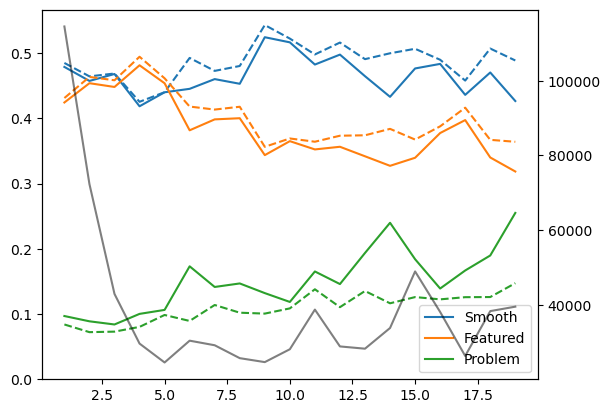

In [7]:
fig, ax = plt.subplots()

# add second axis
ax2 = ax.twinx()

# get default color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(df_agg['value']['<lambda_0>'][1:-1], label='Smooth', color=colors[0])
ax.plot(df_agg_after['value']['<lambda_0>'][1:-1], color=colors[0], linestyle='--')

ax.plot(df_agg['value']['<lambda_1>'][1:-1], label='Featured', color=colors[1])
ax.plot(df_agg_after['value']['<lambda_1>'][1:-1], color=colors[1], linestyle='--')

ax.plot(df_agg['value']['<lambda_2>'][1:-1], label='Problem', color=colors[2])
ax.plot(df_agg_after['value']['<lambda_2>'][1:-1], color=colors[2], linestyle='--')

ax2.plot(df_agg['value']['count'][1:-1], label='Count', color='black', alpha=.5)
ax.legend()

ax.set_ylim([0., None])

# naively, shift away from featured and towards problem
# after accounting for users who say problem a weird amount, shift is much more moderate but still present

In [8]:
df_agg = df.groupby('user_id').agg({'value': [lambda x: (x=='smooth').mean(), lambda x: (x=='featured-or-disk').mean(), lambda x: (x=='problem').mean(), 'count']}).reset_index()
# plt.scatter(df_agg['value']['<lambda_0>'], df_agg['value']['<lambda_1>'], s=1.)

0.0200748824982076

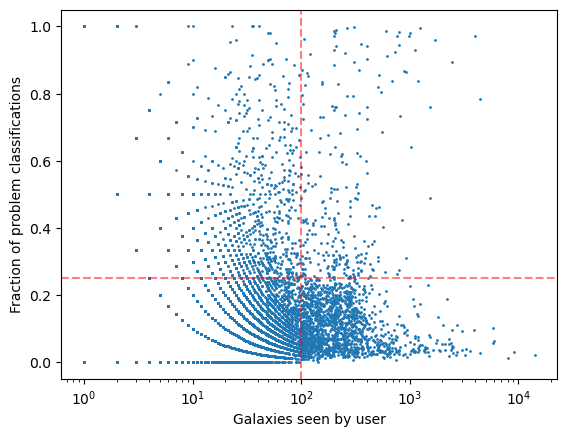

In [9]:
min_count = 100
max_problem_frac = 0.25

fig, ax = plt.subplots()
ax.scatter(df_agg['value']['count'], df_agg['value']['<lambda_2>'],  s=1.)
ax.set_xscale('log')
ax.set_xlabel('Galaxies seen by user')
ax.set_ylabel('Fraction of problem classifications')

ax.axhline(max_problem_frac, color='red', linestyle='--', alpha=.5)
ax.axvline(min_count, color='red', linestyle='--', alpha=.5)

((df_agg['value']['count'] > min_count) & (df_agg['value']['<lambda_2>'] > max_problem_frac)).mean()

In [9]:
# df = pd.read_csv('/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_reduced_votes_2024_12_23_ortho.csv')
df = pd.read_csv('/home/walml/repos/gz-panoptes-reduction/data/euclid/euclid_challenge_reduced_votes_2024_12_23_after_user_removal_ortho.csv')
df = df[df['smooth-or-featured-euclid_total-votes'] >= 5]
print(df['smooth-or-featured-euclid_featured-or-disk_fraction'].mean())
more_than_twenty = df[df['smooth-or-featured-euclid_total-votes'] >= 20]
test_catalog = more_than_twenty
train_and_val_catalog = df[~df.index.isin(test_catalog.index)]
print(len(train_and_val_catalog), len(test_catalog))  
print(train_and_val_catalog['smooth-or-featured-euclid_featured-or-disk_fraction'].mean())
print(test_catalog['smooth-or-featured-euclid_featured-or-disk_fraction'].mean())  
# test catalog is collected earlier and therefore has a higher fraction of featured responses. user removal reduces mean shift by about a third, so still very present

0.41177392480325514
87374 3646
0.40950868475656277
0.46605891762818735


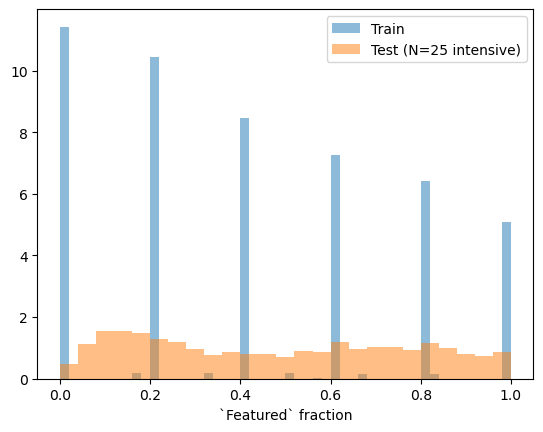

In [10]:
train_and_val_catalog.columns = train_and_val_catalog.columns.str.replace('-euclid', '')
test_catalog.columns = test_catalog.columns.str.replace('-euclid', '')
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(train_and_val_catalog['smooth-or-featured_featured-or-disk_fraction'], density=True, alpha=0.5, bins=50, label='Train')
ax.hist(test_catalog['smooth-or-featured_featured-or-disk_fraction'], density=True, bins=25, label='Test (N=25 intensive)', alpha=.5)
ax.set_xlabel('`Featured` fraction')
ax.legend()
plt.show()

In [5]:
len(df)

91020